# Function Interpolation

This is the first exercise in the course, where the goal is to interpolate single-dimensional function and experimentally compare interpolation methods by comparing $L_2$ metric. 

### Resources

* [Illustrated Guide to Interpolation Methods](https://maidens.github.io/jekyll/update/2016/08/10/An-illustrated-guide-to-interpolation-methods.html)
* [Cubic Convolution](http://verona.fi-p.unam.mx/boris/practicas/CubConvInterp.pdf)
* [Splines](https://people.computing.clemson.edu/~dhouse/courses/405/notes/splines.pdf)
* [Cubic Splines @ Wolfram Mathworld](https://mathworld.wolfram.com/CubicSpline.html)
* [Interpolation by Convolution](https://zipcpu.com/dsp/2018/01/16/interpolation-is-convolution.html)
* [Transposed Convolution](https://naokishibuya.medium.com/up-sampling-with-transposed-convolution-9ae4f2df52d0)

### Setup

In [1]:
import sys

sys.path.append("../src")

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import interpolate
from sklearn import metrics

from src.plots import PlotData, plot_interpolation
from src import kernels
from src.conv import conv1d_interpolate

In [3]:
sns.set()

Define three example functions to interpolate

In [4]:
def simple(x):
    return np.sin(2*x)

def inverted_sin(x):
    return np.sin(np.power(x, -1))
    
def sign(x):
    return np.sign(np.sin(8*x))


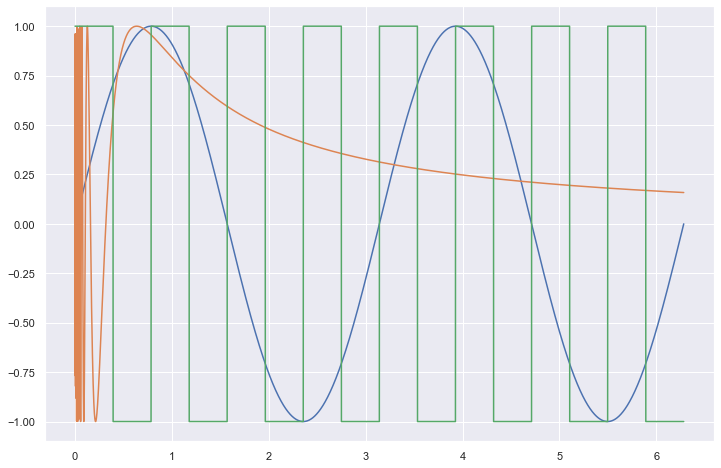

In [5]:
x = np.linspace(1e-6, 2*np.pi, 10_000)  # start from small epsilon to avoid division by zero

y_simple = simple(x)
y_sin_func = inverted_sin(x)
y_sgn_func = sign(x)

_ = plt.figure(figsize=[12, 8])

_ = plt.plot(x, y_simple)
_ = plt.plot(x, y_sin_func)
_ = plt.plot(x, y_sgn_func)

# Linear Interpolation

Simplest and very easy to implement interpolation method using `np.iterp`

MSE: 0.00000108


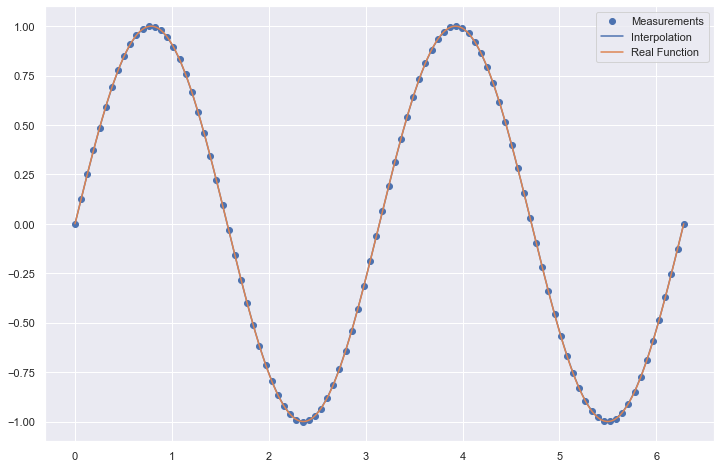

In [6]:
n_samples = 100
n_predictions = 10_000

x = np.linspace(1e-6, 2*np.pi, n_samples)
y = simple(x)
    
x_interp = np.linspace(1e-6, 2*np.pi, n_predictions)
y_interp = np.interp(x_interp, x, y)
y_true = simple(x_interp)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_interp, y_true=y_true):.8f}")
plot_interpolation(measure=PlotData(x=x, y=y), interpolation=PlotData(x=x_interp, y=y_interp), real=PlotData(x=x_interp, y=y_true))

MSE: 0.01227584


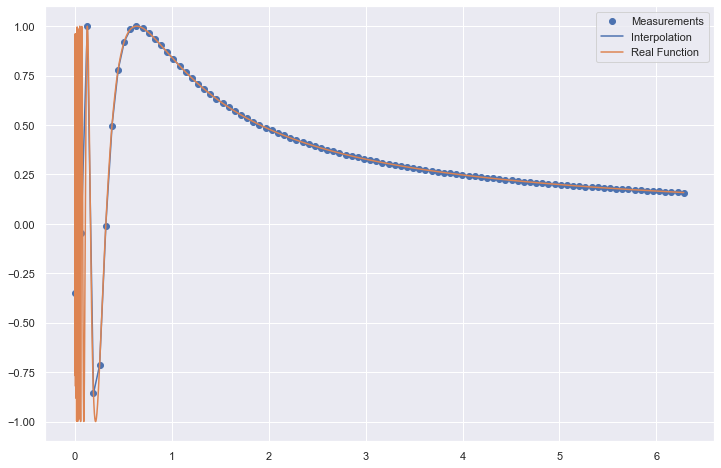

In [7]:
n_samples = 100
n_predictions = 10_000

x = np.linspace(1e-6, 2*np.pi, n_samples)
y = inverted_sin(x)
    
x_interp = np.linspace(1e-6, 2*np.pi, n_predictions)
y_interp = np.interp(x_interp, x, y)
y_true = inverted_sin(x_interp)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_interp, y_true=y_true):.8f}")
plot_interpolation(measure=PlotData(x=x, y=y), interpolation=PlotData(x=x_interp, y=y_interp), real=PlotData(x=x_interp, y=y_true))

MSE: 0.09481188


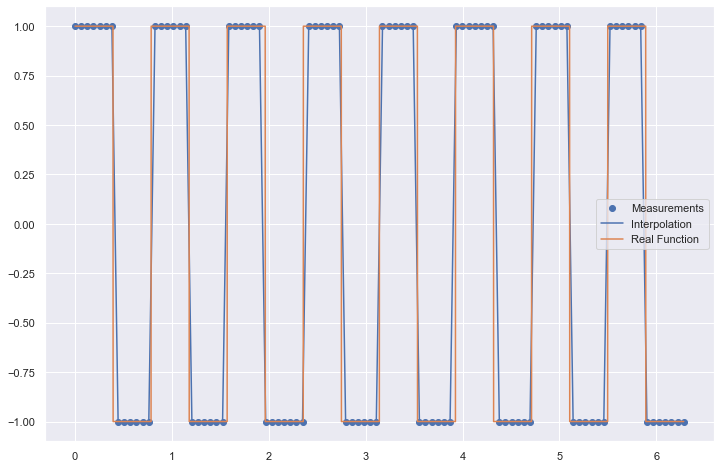

In [8]:
n_samples = 100
n_predictions = 10_000

x = np.linspace(1e-6, 2*np.pi, n_samples)
y = sign(x)
    
x_interp = np.linspace(1e-6, 2*np.pi, n_predictions)
y_interp = np.interp(x_interp, x, y)
y_true = sign(x_interp)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_interp, y_true=y_true):.8f}")
plot_interpolation(measure=PlotData(x=x, y=y), interpolation=PlotData(x=x_interp, y=y_interp), real=PlotData(x=x_interp, y=y_true))

# Spline Interpolation

Simple interpolation using `scipy.interpolate.CubicSpline` class

MSE: 0.10223590


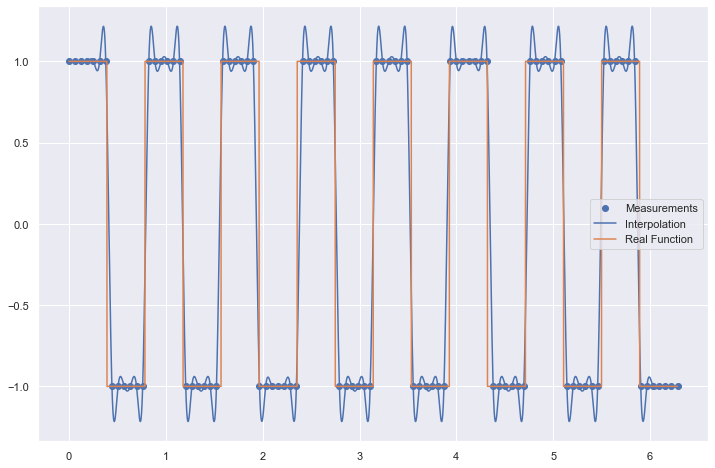

In [9]:
n_samples = 100  # define each time to easily change and investigate results
n_predictions = 10_000

x = np.linspace(1e-6, 2*np.pi, n_samples)
y = sign(x)

spline = interpolate.CubicSpline(x, y)
x_interp = np.linspace(1e-6, 2*np.pi, n_predictions)
y_interp = spline(x_interp)
y_true = sign(x_interp)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_interp, y_true=y_true):.8f}")
plot_interpolation(measure=PlotData(x=x, y=y), interpolation=PlotData(x=x_interp, y=y_interp), real=PlotData(x=x_interp, y=y_true))

# BSpline

Alternatively use spline representation `splrep` function to get `BSpline` parameters

MSE: 0.10223590


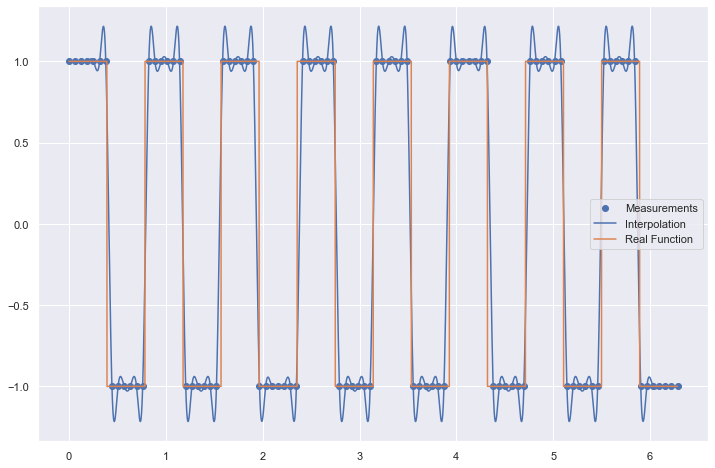

In [10]:
n_samples = 100  # define each time to easily change and investigate results
n_predictions = 10_000

x = np.linspace(1e-6, 2*np.pi, n_samples)
y = sign(x)

t, c, k = interpolate.splrep(x, y)  # get b-spline representation of a set of points
spline = interpolate.BSpline(t, c, k)

x_interp = np.linspace(1e-6, 2*np.pi, n_predictions)
y_interp = spline(x_interp)
y_true = sign(x_interp)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_interp, y_true=y_true):.8f}")
plot_interpolation(measure=PlotData(x=x, y=y), interpolation=PlotData(x=x_interp, y=y_interp), real=PlotData(x=x_interp, y=y_true))

# Interpolation with Convolution

Interpolation can be implemented using convolution opreation with pre-defined kernel. <br>

Plot 5 selected kernels using zero-offset and unit width.

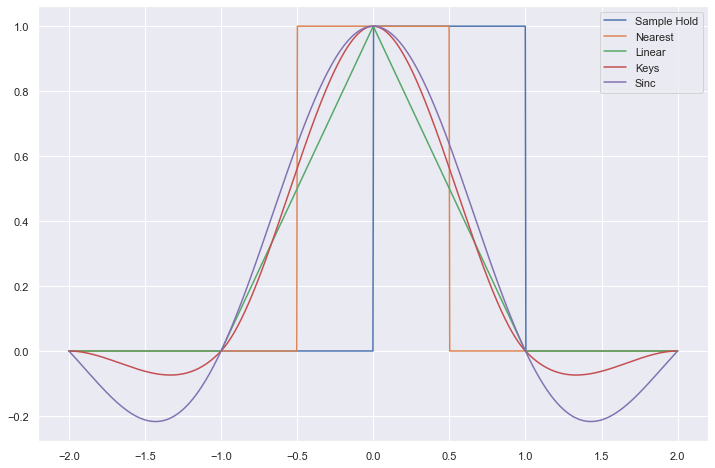

In [11]:
x = np.linspace(-2, 2, 1000)

_ = plt.figure(figsize=[12, 8])

_ = plt.plot(x, kernels.sample_hold_kernel(x, offset=0, width=1))
_ = plt.plot(x, kernels.nearest_neighbour_kernel(x, offset=0, width=1))
_ = plt.plot(x, kernels.linear_kernel(x, offset=0, width=1))
_ = plt.plot(x, kernels.keys_kernel(x, offset=0, width=1))
_ = plt.plot(x, kernels.sinc_kernel(x, offset=0, width=1, alpha=np.inf))

_ = plt.legend(["Sample Hold", "Nearest", "Linear", "Keys", "Sinc"])

MSE: 0.00217802


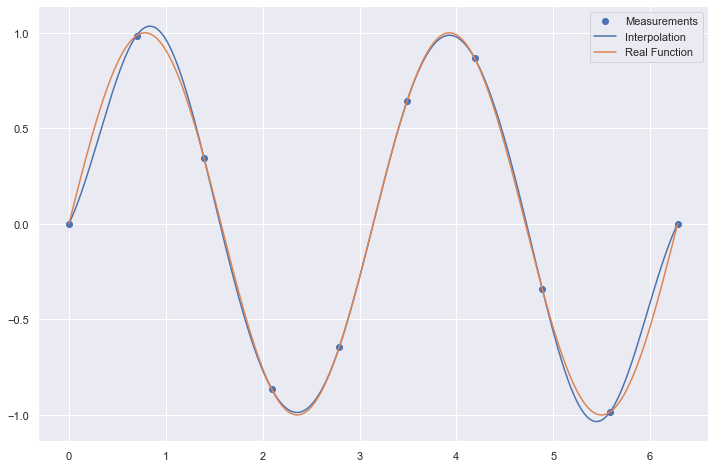

In [16]:
n_samples = 10  # define each time to easily change and investigate results
n_predictions = 10_000

x = np.linspace(1e-6, 2*np.pi, n_samples)
y = simple(x)

x_interp = np.linspace(1e-6, 2*np.pi, n_predictions)
y_interp = conv1d_interpolate(x_measure=x, y_measure=y, x_interpolate=x_interp, kernel=kernels.sinc_kernel)
y_true = simple(x_interp)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_interp, y_true=y_true):.8f}")
plot_interpolation(measure=PlotData(x=x, y=y), interpolation=PlotData(x=x_interp, y=y_interp), real=PlotData(x=x_interp, y=y_true))